# Zemanta Data Science Summer School 2018
## Data Science Basics

In [2]:
import re
import scipy as sp
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In the cell below you can add more functions
<br> Keeping the code seperate like this will help you keep you code clean and readable

In [3]:
def remove_outliers(data, col):
    m = data[col].mean()
    s = data[col].std()
    return data[(data[col] < m + 2*s) & (data[col] >  m - 2*s)]

The data can be downloaded at https://www.kaggle.com/fernandol/countries-of-the-world
<br>unzip it and place it in this folder
<br>The cell below is used to make a new csv file, that can be read properly using pandas

In [4]:
with open('countries of the world.csv', 'r') as f:
    out = re.sub(r'"[0-9]+,[0-9]+"', lambda x: x.group(0).replace(",", "."), f.read())
    with open('countries.csv', 'w') as f2:
        f2.write(out)

### Data import and cleaning

In [5]:
df = pd.read_csv('countries.csv',
                 usecols=['Country', 'Region', 'Population',
                          'Area (sq. mi.)', 'GDP ($ per capita)',
                          'Birthrate', 'Deathrate'],
                 dtype={'Country': 'category', 'Region': 'category',
                        'Population': np.float64, 'Area (sq. mi.)': np.float32,
                        'GDP ($ per capita)': np.float32, 'Birthrate': np.float32,
                        'Deathrate': np.float32})
df.columns = ['country', 'region', 'population', 'area', 'gdp', 'birthrate', 'deathrate']
df.country = df.country.str.strip()
df.region = df.region.str.strip()

In [6]:
df.isnull().sum()

country       0
region        0
population    0
area          0
gdp           1
birthrate     3
deathrate     4
dtype: int64

In [7]:
len(df.dropna()) / len(df)

0.9823788546255506

Removes all rows that are missing values, not the best practice in general, but above we checked, how many lines are missing data and decided, that this would be a good solution

In [8]:
df.dropna(inplace=True)

We can always add more columns to the existing DataFrame

In [9]:
df['coefficient'] = df.birthrate / df.deathrate
df['area_per_person'] = df.area / df.population

In [10]:
df[df.coefficient < 1]

,country,region,population,area,gdp,birthrate,deathrate,coefficient,area_per_person
12,Austria,WESTERN EUROPE,8192880.0,83870.0,30000.0,8.740000,9.760000,0.895492,0.010237
18,Belarus,C.W. OF IND. STATES,10293011.0,207600.0,6100.0,11.160000,14.020000,0.796006,0.020169
26,Botswana,SUB-SAHARAN AFRICA,1639833.0,600370.0,9000.0,23.080000,29.500000,0.782373,0.366117
30,Bulgaria,EASTERN EUROPE,7385367.0,110910.0,7600.0,9.650000,14.270000,0.676244,0.015018
50,Croatia,EASTERN EUROPE,4494749.0,56542.0,10600.0,9.610000,11.480000,0.837108,0.012580
53,Czech Republic,EASTERN EUROPE,10235455.0,78866.0,15700.0,9.020000,10.590000,0.851747,0.007705
64,Estonia,BALTICS,1324333.0,45226.0,12300.0,10.040000,13.250000,0.757736,0.034150
76,Germany,WESTERN EUROPE,82422299.0,357021.0,27600.0,8.250000,10.620000,0.776836,0.004332
79,Greece,WESTERN EUROPE,10688058.0,131940.0,20000.0,9.680000,10.240000,0.945313,0.012345
85,Guernsey,WESTERN EUROPE,65409.0,78.0,20000.0,8.810000,10.010000,0.880120,0.001192


In [11]:
df = remove_outliers(df, 'area_per_person')

### Modeling and plotting

In [12]:
x = df.gdp
y = df.area_per_person

In [13]:
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

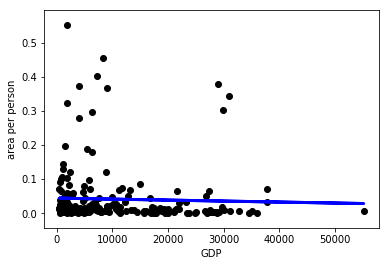

In [14]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.ylabel('area per person')
plt.xlabel('GDP')
plt.show()

In [16]:
df.groupby(['region'], as_index=False).population.mean()

,region,population
0,ASIA (EX. NEAR EAST),1.317137e+08
1,BALTICS,2.394991e+06
2,C.W. OF IND. STATES,2.334013e+07
3,EASTERN EUROPE,1.004712e+07
4,LATIN AMER. & CARIB,1.248499e+07
5,NEAR EAST,1.219177e+07
6,NORTHERN AFRICA,3.222682e+07
7,NORTHERN AMERICA,8.290399e+07
8,OCEANIA,1.741803e+06
9,SUB-SAHARAN AFRICA,1.469484e+07
